In [5]:
import pandas as pd
import json

In [6]:
df = pd.read_csv("../data/isketcher/exp_log.csv", index_col=0)
df

,username,mode,timestamp,sketches,outputs
seq_id,,,,,
f2ee3aa1-6ae2-4b94-b4d1-441a5d42e625,谷垣 健太,1,20220129-034753,"[[[[135, 108], [134, 97], [134, 87], [134, 82]...",NaN
eb12fc11-d11f-4f92-a1ab-5a14a4edcd32,谷垣 健太,1,20220129-041101,"[[[[87, 119.0234375], [87, 112.0234375], [87, ...",NaN
7920f522-1edb-4925-a1e6-76820d27a1a1,Kenta,2,20220129-041146,"[[[[222, 200], [215, 200], [201, 199], [184, 1...",NaN
c286218d-9ed5-418d-a49f-4ae2ca10b204,Kenta,2,20220129-042334,"[[[[213, 249], [213, 249], [213, 249], [213, 2...",NaN
3400cb6d-2334-4a36-b119-0d1ab4bed374,aaaa,1,20220129-042421,"[[[[234.5, 141], [230.5, 143], [226.5, 146], [...",NaN
...,...,...,...,...,...
2cc3c5d0-fda1-49d6-8726-7ce6f45208b0,伊藤 克輝,3,20220206-011421,"[[[[575.5, 101], [575.5, 101], [575.5, 101], [...","[{""name"": ""star"", ""position"": [439, 136, 92, 1..."
963c97c5-c901-4d2f-975e-49de6441a5d9,Example,3,20220206-055233,"[[[[151, 296.0234375], [151, 296.0234375], [15...","[{""name"": ""tree"", ""position"": [173, 223, 162, ..."
31f15042-31d3-41dd-aac8-fe4efb8fe6f7,Example,3,20220206-055255,"[[[[509, 295.0234375], [510, 295.0234375], [51...","[{""name"": ""tree"", ""position"": [205, 229, 200, ..."


In [7]:
seq_id = "a5420e89-f501-4fc0-8901-2387cbb14345"
sketches = json.loads(df.loc[seq_id]["sketches"])
len(sketches)

10

In [22]:
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [35]:
from pprint import pprint
pprint(json.loads(df.loc[seq_id]["outputs"]))

[{'name': 'cloud', 'position': [547, 137, 157, 87]},
 {'name': 'tree', 'position': [432, 310, 326, 432]},
 {'name': 'tree', 'position': [632, 349, 266, 325]},
 {'name': 'cat', 'position': [560, 568, 141, 140]},
 {'name': 'flower', 'position': [475, 574, 90, 87]}]


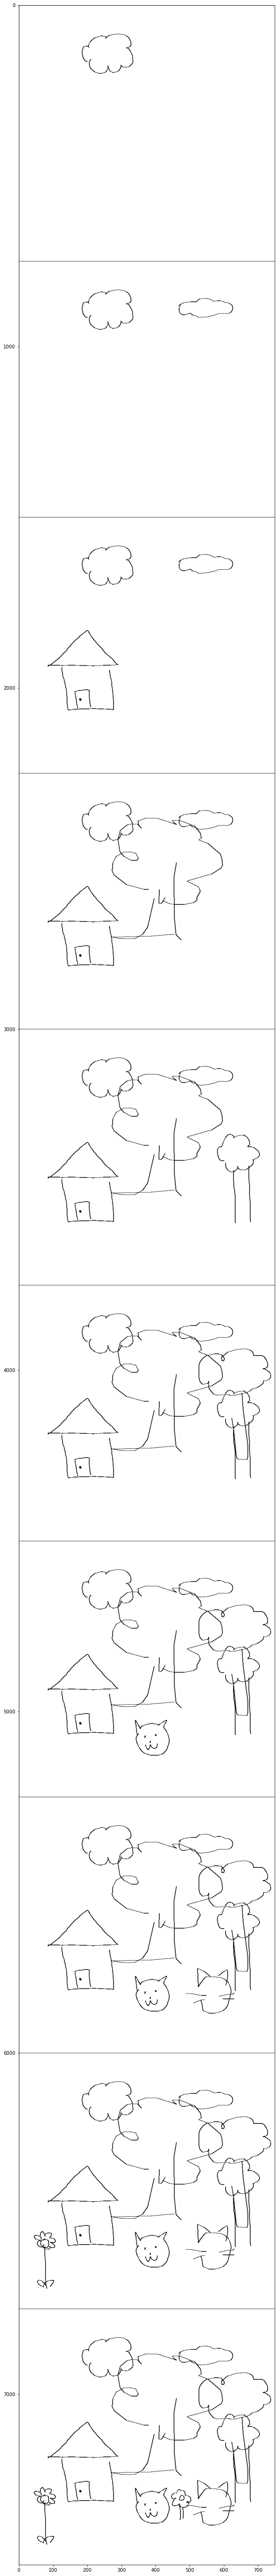

In [31]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

canvas = Image.new('RGB', (750, 750), (255, 255, 255))
draw = ImageDraw.Draw(canvas)
canvas_list = []
canvas_turn = Image.new('RGB', (750, 750), (255, 255, 255))
draw_turn = ImageDraw.Draw(canvas_turn)
draw_turn.rectangle((0, 0, 750, 750), fill=None, outline=(0, 0, 0))

for turn, lines in enumerate(sketches):
    for line in lines:
        for i in range(len(line)-1):
            x1, y1 = line[i]
            x2, y2 = line[i+1]
            draw_turn.line((x1, y1, x2, y2), fill=(0, 0, 0), width=2) 
            if turn % 2 == 0:
                draw.line((x1, y1, x2, y2), fill=(0, 0, 0), width=2)
            else:
                draw.line((x1, y1, x2, y2), fill=(255, 0, 0), width=2)
    canvas_list.append(canvas_turn.copy())

plt.figure(figsize=(10, 100))
# plt.imshow(canvas)

dst = canvas_list[0]
for c in canvas_list[1:]:
    dst = get_concat_v(dst, c)
plt.imshow(dst)
